In [10]:
import os

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
import torch
import torchvision.transforms as T
import numpy as np
from PIL import Image

## Verifying image loading is the right format

In [ ]:
path = '/home/yamins/.local/lib/python3.7/site-packages/model_tools/check_submission/images'

In [3]:
from model_tools.activations.pytorch import load_preprocess_images

In [4]:
import functools

In [5]:
preprocessing = functools.partial(load_preprocess_images, image_size=224)

In [6]:
load_preprocess_images?

In [12]:
impath = os.path.join(path, '10.png')
im = load_preprocess_images([impath], image_size=224)

In [18]:
im.shape

(1, 3, 224, 224)

In [66]:
imval = im[0].swapaxes(0, 1).swapaxes(1, 2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


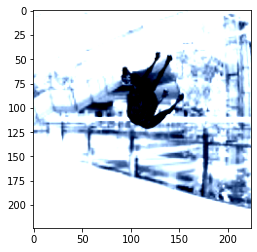

In [67]:
plt.imshow(imval)

In [71]:
load_preprocess_images

<function model_tools.activations.pytorch.load_preprocess_images(image_filepaths, image_size, **kwargs)>

In [76]:
impath = os.path.join(path, '10.png')

imval = Image.open(impath)

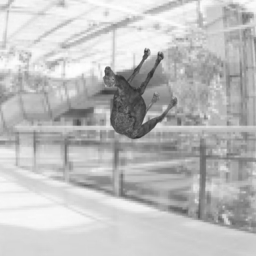

In [79]:
imval

In [81]:
imval.mode

'L'

In [107]:
def load_preprocess_images(image_filepaths, image_size, **kwargs):
    images = load_images(image_filepaths)
    images = preprocess_images(images, image_size=image_size, **kwargs)
    return images


def load_images(image_filepaths):
    return [load_image(image_filepath) for image_filepath in image_filepaths]


def load_image(image_filepath):
    with Image.open(image_filepath) as pil_image:
        if 'L' not in pil_image.mode.upper() and 'A' not in pil_image.mode.upper() and 'P' not in pil_image.mode.upper():
            return pil_image.copy()
        else:  # make sure potential binary images are in RGB
           rgb_image = Image.new("RGB", pil_image.size)
           rgb_image.paste(pil_image)
           return rgb_image


def preprocess_images(images, image_size, **kwargs):
    preprocess = torchvision_preprocess_input(image_size, **kwargs)
    images = [preprocess(image) for image in images]
    images = np.concatenate(images)
    return images


def torchvision_preprocess_input(image_size, **kwargs):
    from torchvision import transforms
    return transforms.Compose([
    transforms.Resize((image_size, image_size)),
    torchvision_preprocess(**kwargs),
    ])

def torchvision_preprocess(normalize_mean=(0.485, 0.456, 0.406), normalize_std=(0.229, 0.224, 0.225)):
    from torchvision import transforms
    return transforms.Compose([
        transforms.ToTensor(),
        lambda img: 255 * img.unsqueeze(0)
    ])


In [109]:
imval = load_preprocess_images([impath], image_size=224)

In [110]:
imval.shape

(1, 3, 224, 224)

In [111]:
imval.dtype

dtype('float32')

## looking at model outputs

In [115]:
from model_tools.activations.pytorch import PytorchWrapper

In [112]:
from r3m import load_r3m

In [119]:
r3m18cpu = load_r3m("resnet18") # resnet18, resnet34
r3m18cpu.eval();
r3m18cpu = r3m18cpu.module.to('cpu')

In [120]:
preprocessing = functools.partial(load_preprocess_images, image_size=224)
r3m18_wrapper = PytorchWrapper(identifier='r3m18', model=r3m18cpu, preprocessing=preprocessing)
r3m18_wrapper.image_size = 224


In [128]:
r3m18_wrapper

R3M(
  (cs): CosineSimilarity()
  (bce): BCELoss()
  (sigm): Sigmoid()
  (convnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): B

In [156]:
outval = r3m18_wrapper([impath], layers=['convnet.layer4.1'])

layer packaging: 100%|██████████████████| 1/1 [00:00<00:00, 15.60it/s]


In [157]:
outval.shape

(1, 25088)

In [137]:
outval1 = r3m18_wrapper([impath], layers=['convnet.avgpool'])

layer packaging: 100%|█████████████████| 1/1 [00:00<00:00, 123.63it/s]


In [145]:
outval1.shape

(1, 512)

In [143]:
outval2 = r3m18_wrapper([impath], layers=['convnet.fc'])

layer packaging: 100%|█████████████████| 1/1 [00:00<00:00, 148.32it/s]


In [146]:
outval2.shape

(1, 512)

In [147]:
outval2

<xarray.NeuroidAssembly (stimulus_path: 1, neuroid: 512)>
array([[2.23890059e-02, 0.00000000e+00, 1.11244106e+00, 0.00000000e+00,
        0.00000000e+00, 1.21254575e+00, 4.22771797e-02, 0.00000000e+00,
        5.05153835e-03, 0.00000000e+00, 0.00000000e+00, 1.32118468e-04,
        1.72160659e-03, 0.00000000e+00, 0.00000000e+00, 3.69719462e-03,
        2.61783689e-01, 2.82585081e-02, 0.00000000e+00, 7.35571259e-04,
        0.00000000e+00, 1.48862079e-02, 0.00000000e+00, 0.00000000e+00,
        3.64861004e-02, 2.08557006e-02, 4.49901941e-04, 1.34445576e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.86379462e-03,
        1.89280473e-02, 0.00000000e+00, 1.18743487e-01, 0.00000000e+00,
        5.02122156e-02, 1.61848105e-02, 6.00498216e-03, 5.52451760e-02,
        0.00000000e+00, 0.00000000e+00, 2.30014194e-02, 0.00000000e+00,
        9.70503129e-03, 3.27875721e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 7.82278948e-04, 0.00000000e+00, 0.00000000e+00,
        1.96623892e-01, 0.00000000e+00, 1.47654582e-02, 2.64232364e-02,
        2.83872951e-02, 2.52568233e-03, 0.00000000e+00, 3.02864350e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.99913412e-01,
        6.05337024e-02, 9.57812555e-03, 6.63006771e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.56869888e-03,
        1.16382372e-02, 1.21416384e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 9.79520567e-03, 1.55744925e-01,
...
        2.13280082e+00, 0.00000000e+00, 1.27245355e+00, 8.83918907e-03,
        1.12339212e-02, 0.00000000e+00, 2.49355305e-02, 2.00489704e-02,
        0.00000000e+00, 8.49275198e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.32317611e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.42150591e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.50922836e-04, 0.00000000e+00, 0.00000000e+00,
        1.91422310e-02, 0.00000000e+00, 0.00000000e+00, 1.83432788e-01,
        0.00000000e+00, 9.62640107e-01, 0.00000000e+00, 0.00000000e+00,
        6.97729588e-02, 2.03921483e-03, 6.10923134e-02, 0.00000000e+00,
        1.70832388e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.44707009e-01, 9.50744152e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.04915856e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        6.06574817e-03, 3.56889260e-03, 0.00000000e+00, 0.00000000e+00,
        2.13152766e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        8.49261880e-03, 1.75049750e-03, 0.00000000e+00, 0.00000000e+00,
        6.83627427e-02, 0.00000000e+00, 2.36025918e-02, 1.02041091e-03,
        1.03294313e+00, 0.00000000e+00, 0.00000000e+00, 2.66547804e-03]],
      dtype=float32)
Coordinates:
  * stimulus_path  (stimulus_path) <U90 '/home/yamins/.local/lib/python3.7/si...
  * neuroid        (neuroid) MultiIndex
  - neuroid_num    (neuroid) int64 0 1 2 3 4 5 6 ... 505 506 507 508 509 510 511
  - model          (neuroid) object 'r3m18' 'r3m18' 'r3m18' ... 'r3m18' 'r3m18'
  - layer          (neuroid) object 'convnet.fc' 'convnet.fc' ... 'convnet.fc'
  - channel        (neuroid) int64 0 1 2 3 4 5 6 ... 505 506 507 508 509 510 511
  - channel_x      (neuroid) float64 nan nan nan nan nan ... nan nan nan nan nan
  - channel_y      (neuroid) float64 nan nan nan nan nan ... nan nan nan nan nan
  - neuroid_id     (neuroid) object 'r3m18.convnet.fc.0' ... 'r3m18.convnet.f...

In [150]:
impaths = [os.path.join(path, '%d.png' % i) for i in range(10, 20)]
outvals2 = r3m18_wrapper(impaths, layers=['convnet.fc'])

layer packaging: 100%|█████████████████| 1/1 [00:00<00:00, 146.63it/s]


In [155]:
outvals2.shape

(10, 512)

In [158]:
layers = ['convnet.conv1',
          'convnet.maxpool',
          'convnet.layer1.1',
          'convnet.layer2.1'
          'convnet.layer3.1',
          'convnet.layer4.1',
          'convnet.fc']

In [159]:
import r3m_pytorch